In [2]:
# importing the libraries 

import numpy as np
import pandas as pd

from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [12.00, 7.50]


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

EDA ON DATASET

In [62]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

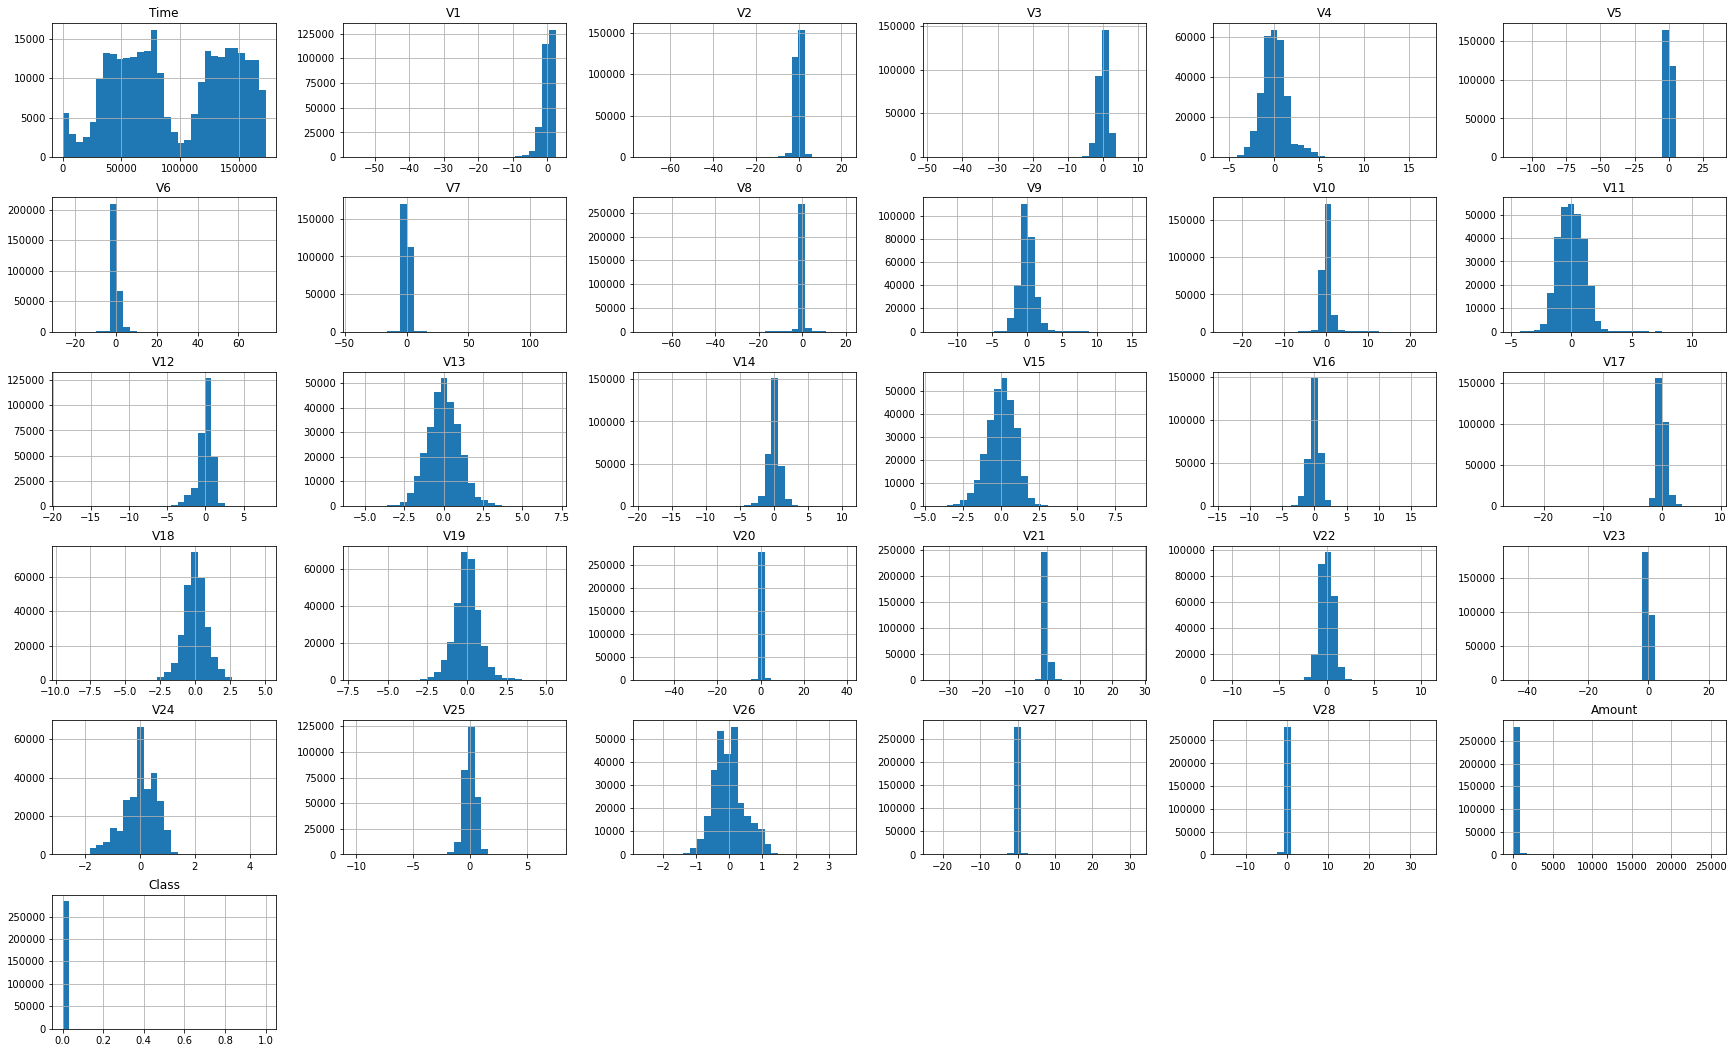

In [7]:
df.hist(bins=30, figsize=(30, 18.5))
plt.show()

In [8]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
fraud_percentage = df[df.Class == 1].shape[0]/df[df.Class == 0].shape[0] * 100

In [10]:
df[df.Class == 1].shape

(492, 31)

In [11]:
fraud_percentage

0.17304750013189596

In [12]:
df0 = df[df.Class == 0].drop(columns = ['Class'], axis = 1)
df1 = df[df.Class == 1].drop(columns = ['Class'], axis = 1)

In [13]:
df0_no_outliers = df0[(df0 > df0.quantile(0.25) - 1.5 * stats.iqr(df0, axis = 0)).all(axis = 1)]

In [14]:
df1_no_outliers = df1[(df1 > df1.quantile(0.25) - 1.5 * stats.iqr(df1, axis = 0)).all(axis = 1)]

In [15]:
df0_no_outliers.loc[:, 'Class'] = 0
df1_no_outliers.loc[:, 'Class'] = 1

C:\Users\mahim\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [16]:
df_no_outliers = pd.concat([df0_no_outliers,df1_no_outliers], axis=0)
df_no_outliers.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [17]:
feature_list = list(df.columns)

In [18]:
feature_list.remove("Class")
print(feature_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


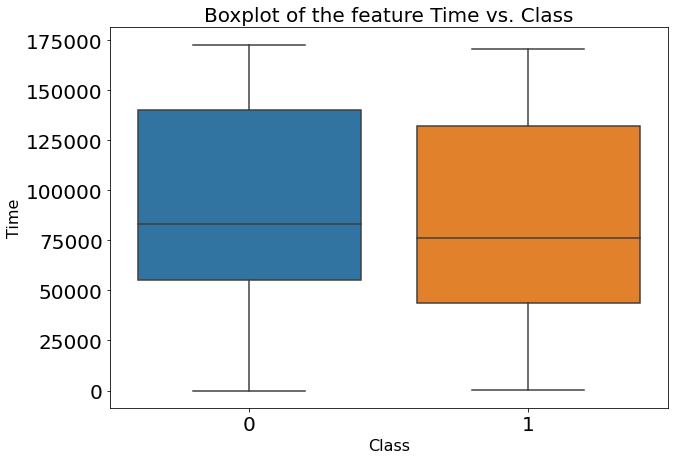

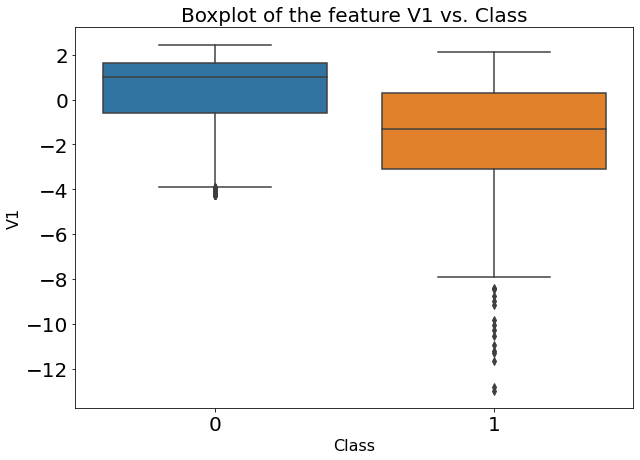

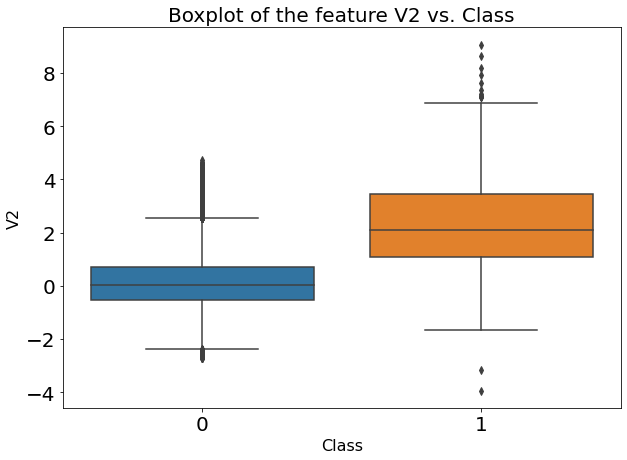

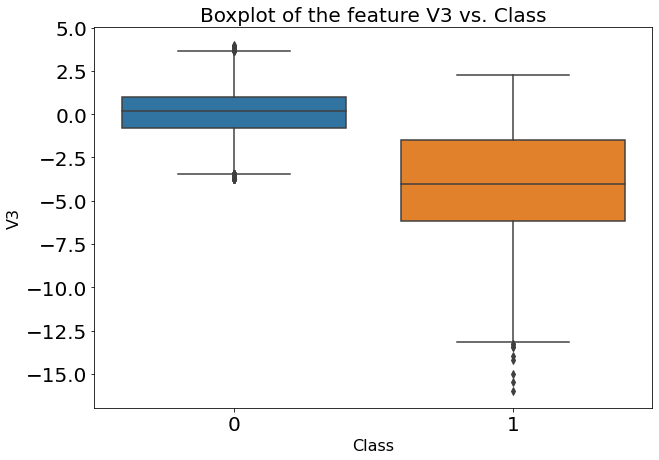

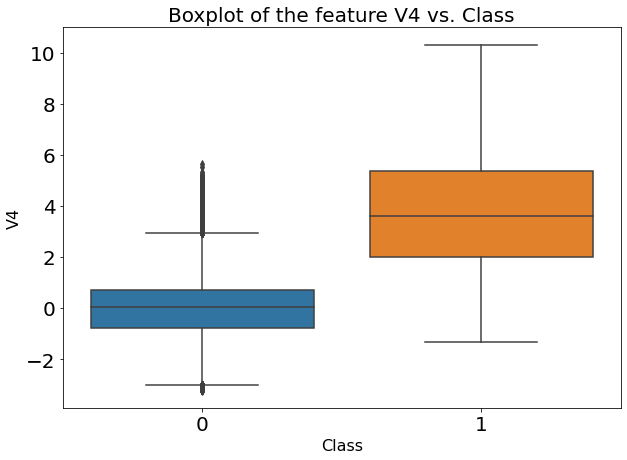

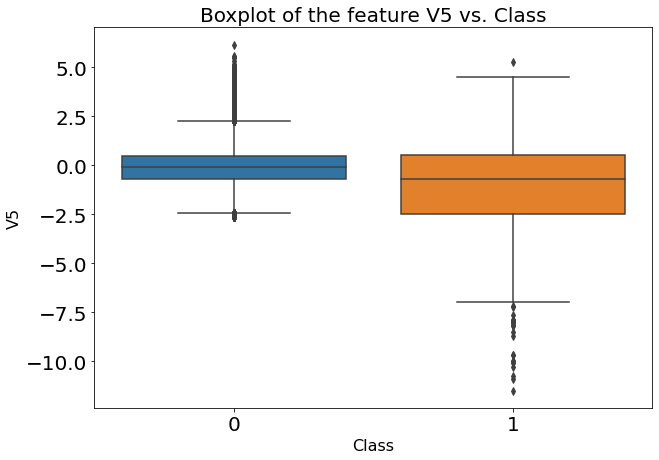

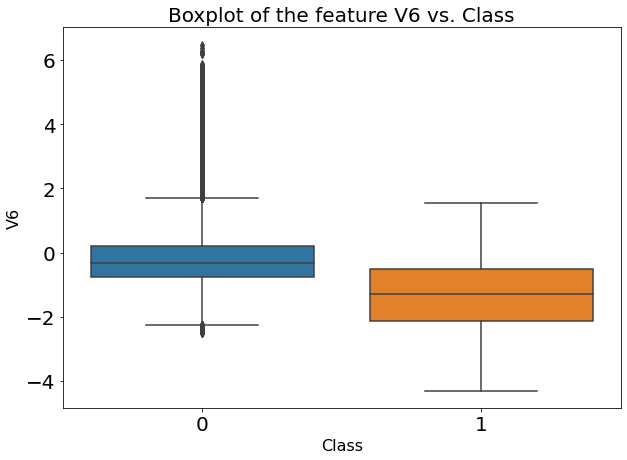

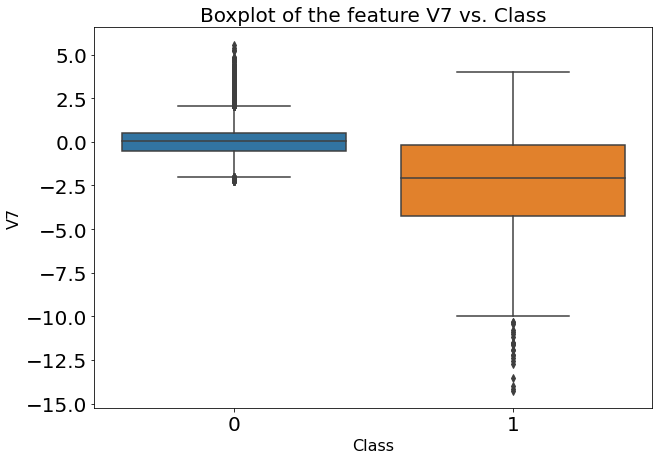

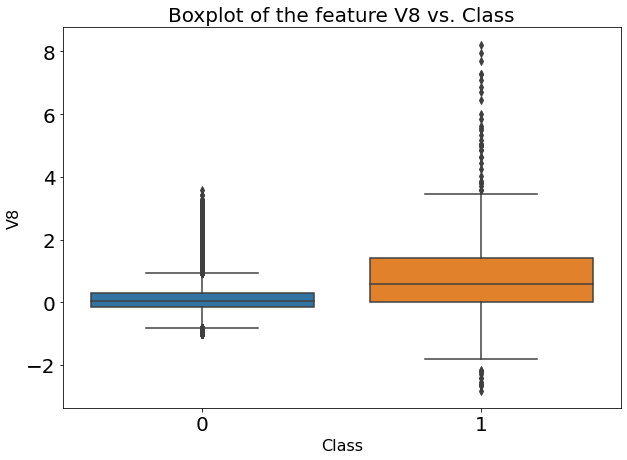

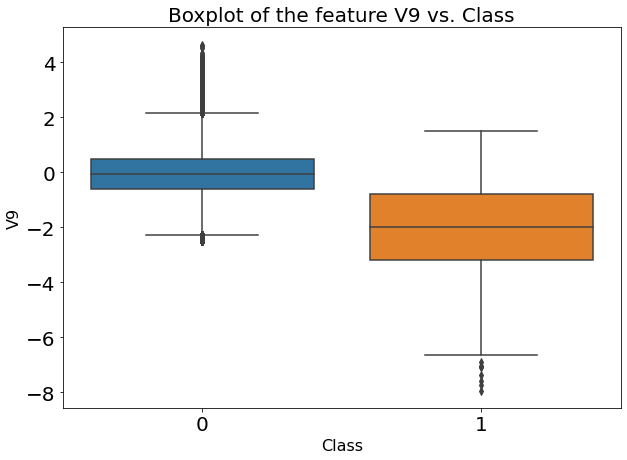

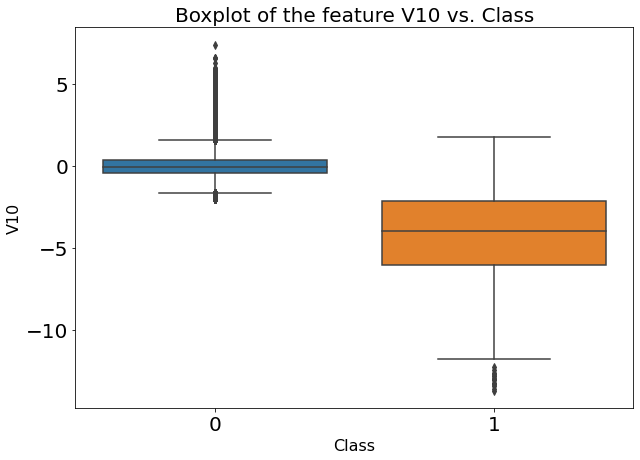

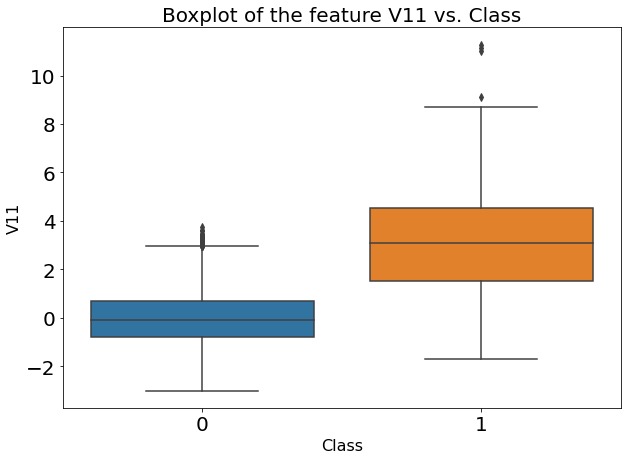

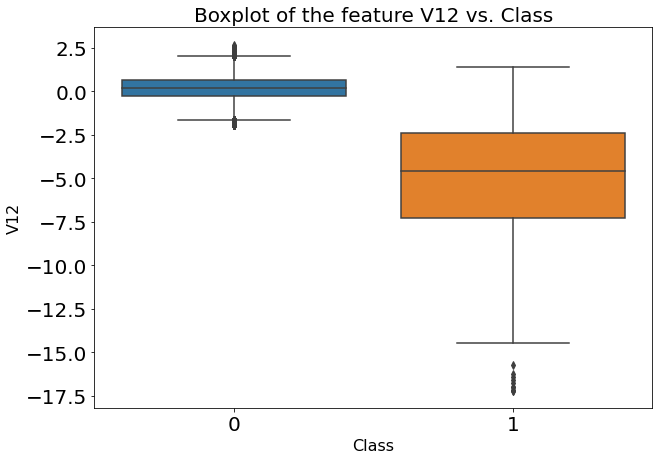

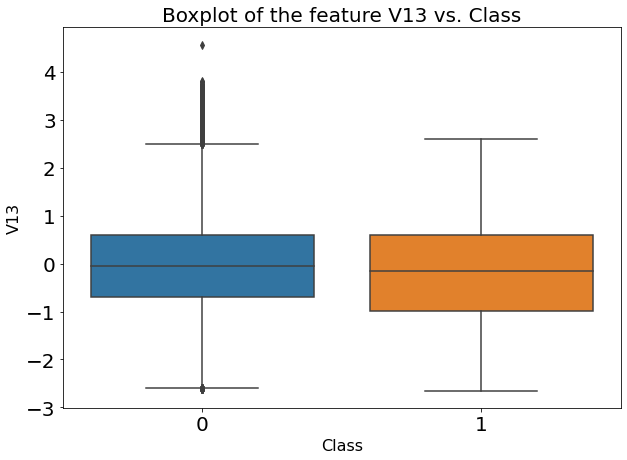

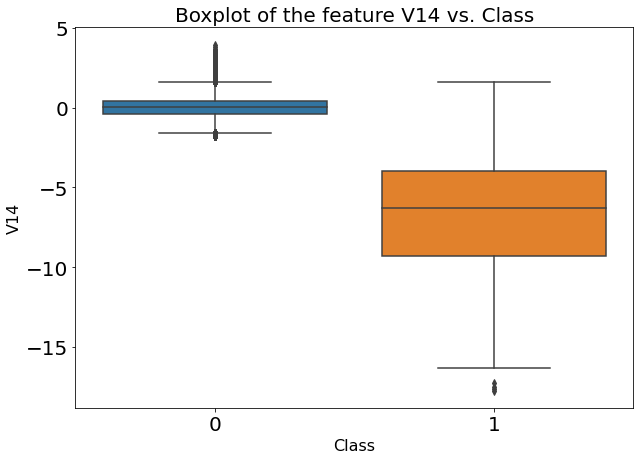

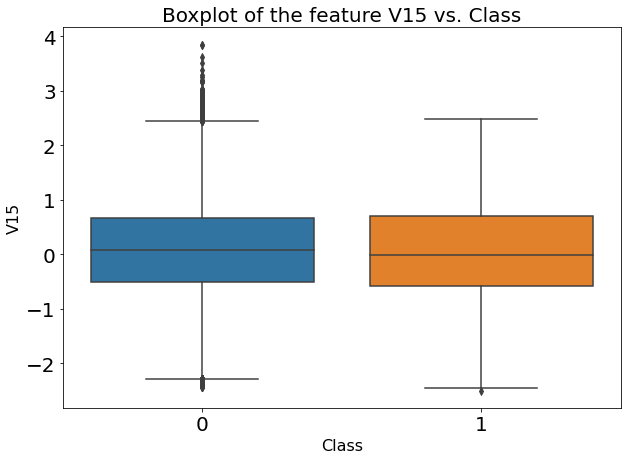

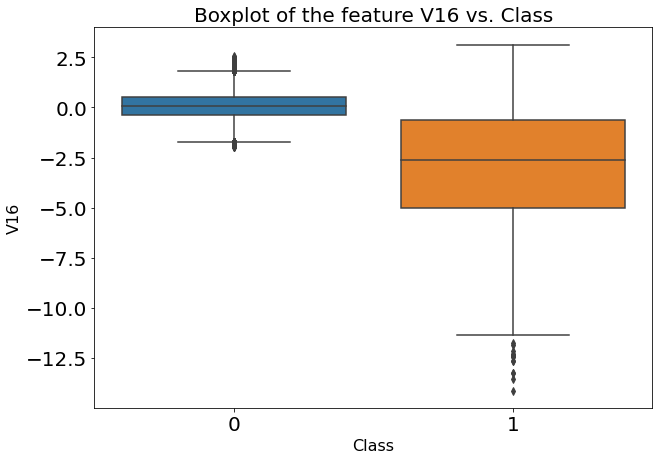

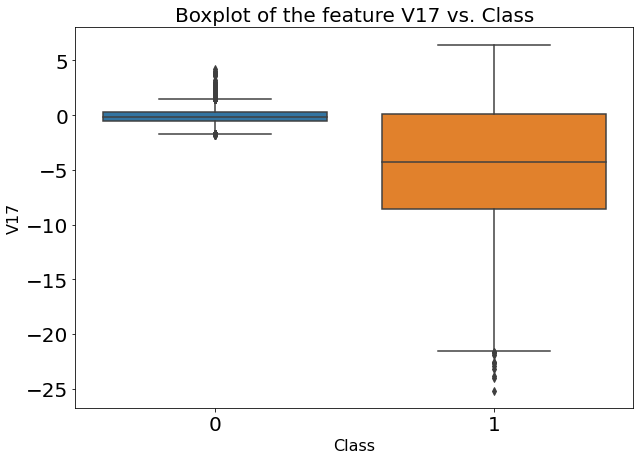

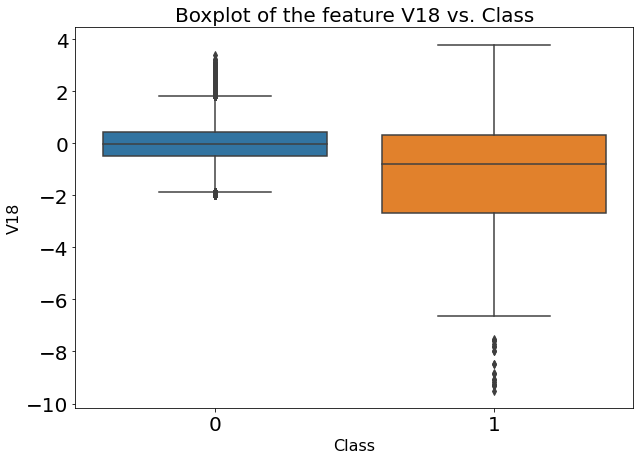

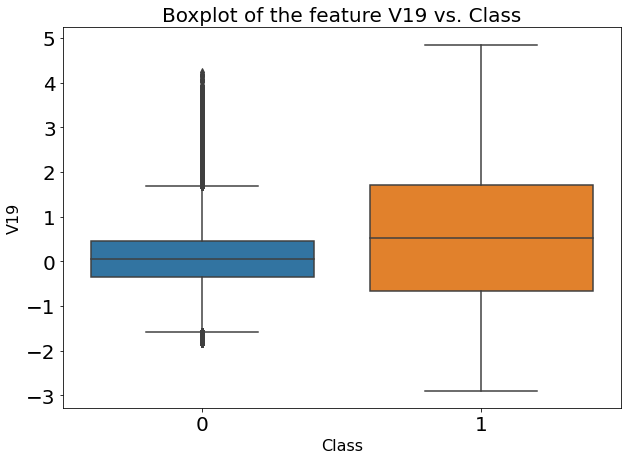

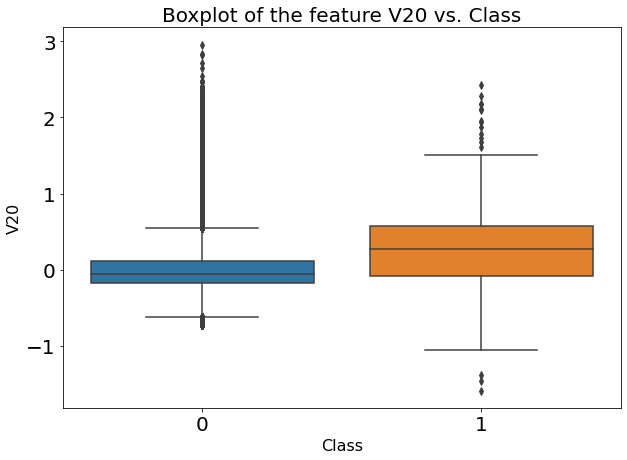

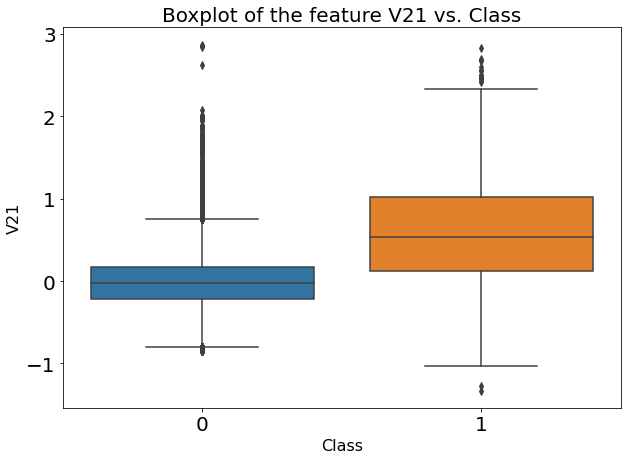

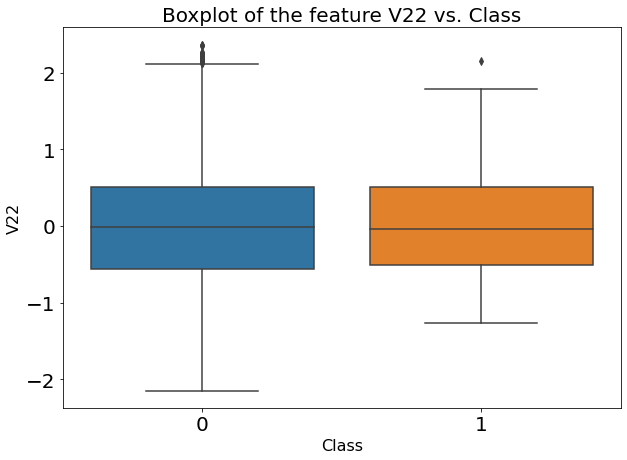

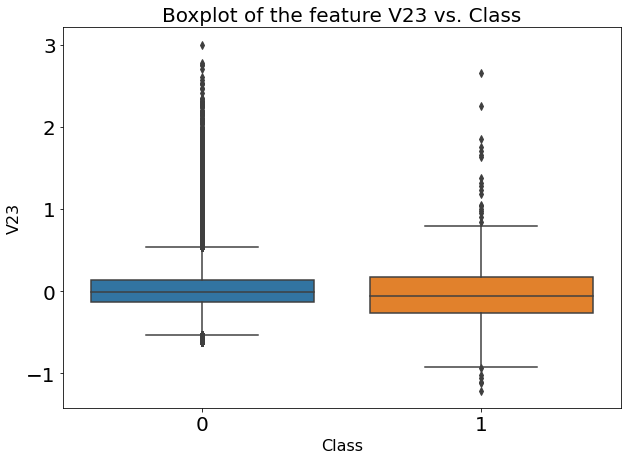

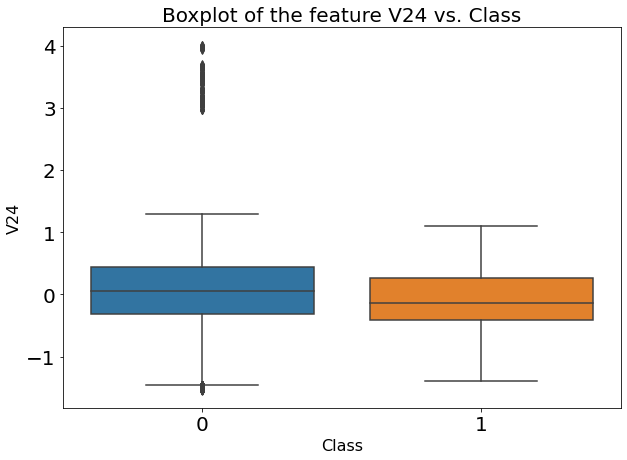

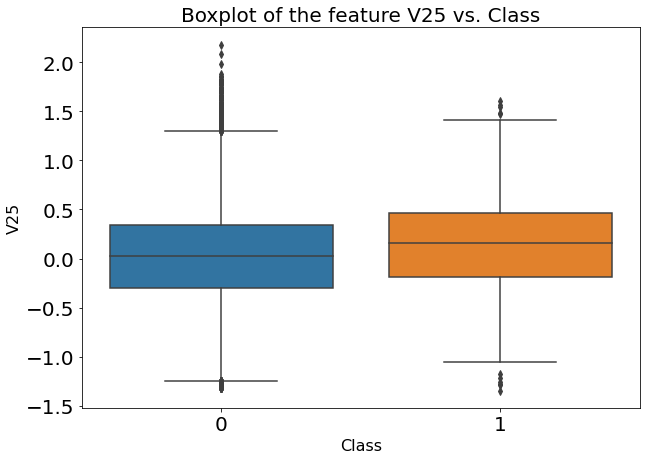

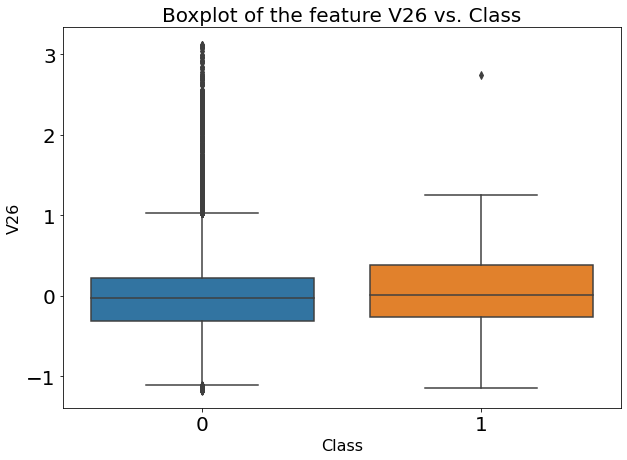

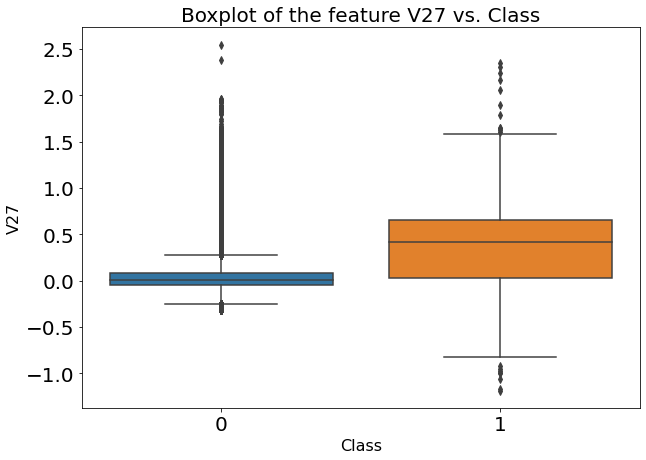

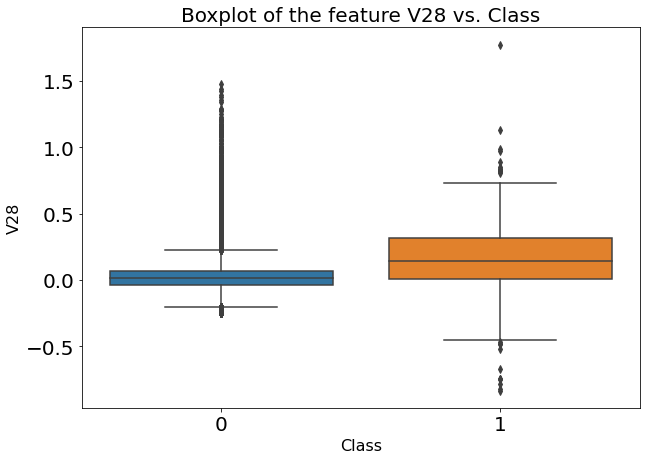

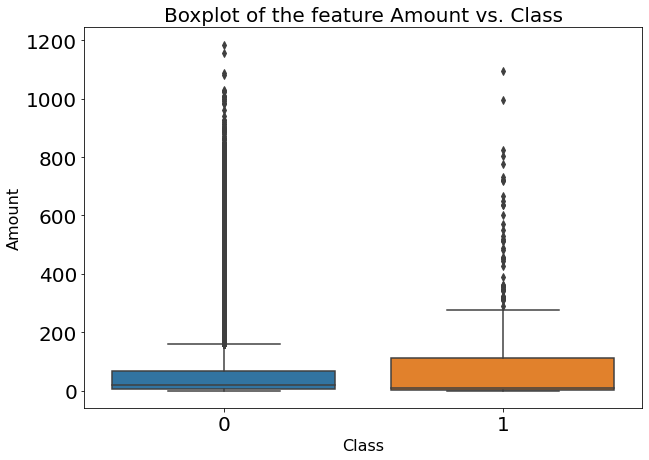

In [19]:
for feature in feature_list:
    plt.figure(figsize=(10,7))
    sns.boxplot(x = df_no_outliers.Class, y = df_no_outliers[feature])
    plt.xlabel('Class', fontsize=16)
    plt.ylabel(feature, fontsize=16)
    plt.title('Boxplot of the feature ' + feature + ' vs. Class', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    
    plt.show()

In [20]:
feature_list_2 = ['V2','V3', 'V4', 'V7','V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18','V27']

In [21]:
corr = df.corr()['Class']
corr

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [24]:
corr = corr[::-1]
corr = corr.abs().sort_values(ascending=False)
corr

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

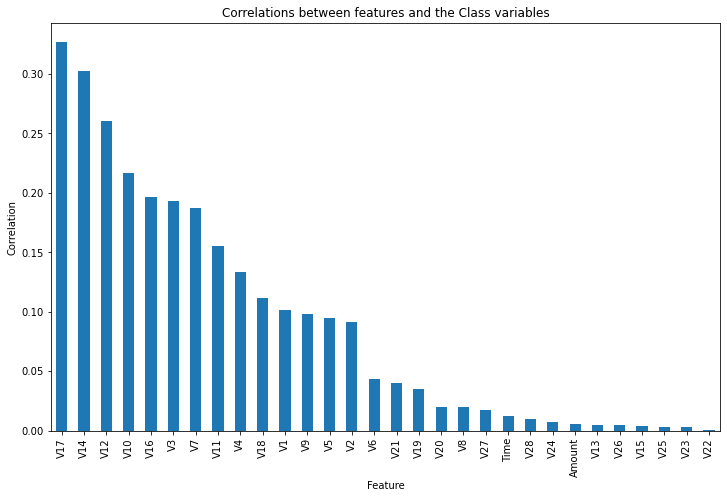

In [25]:
plt.figure(figsize=(12,7.5))
corr_new = corr.drop('Class', axis=0)
corr_new.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlations between features and the Class variables')
plt.show()

In [26]:
relevant_features = list(corr_new[np.abs(corr_new) > 0.09].index)
print(relevant_features)

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'V1', 'V9', 'V5', 'V2']


In [27]:
set(relevant_features) - set(feature_list_2) 

{'V1', 'V5'}

In [28]:
X = df[relevant_features]
y = df['Class']
print('Shape of X = ', X.shape)
print('Shape of y= ', y.shape)

Shape of X =  (284807, 14)
Shape of y=  (284807,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('Shape of X_train: ' , X_train.shape)
print('Shape of y_train: ' , y_train.shape)
print('\nShape of X_test: ' , X_test.shape)
print('Shape of y_test: ' , y_test.shape)

Shape of X_train:  (213605, 14)
Shape of y_train:  (213605,)

Shape of X_test:  (71202, 14)
Shape of y_test:  (71202,)


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print('Shape of X_train_scaled: ' , X_train_scaled.shape)
print('Shape of X_test_scaled: ' , X_test_scaled.shape)

Shape of X_train_scaled:  (213605, 14)
Shape of X_test_scaled:  (71202, 14)


### Random Forest Classifier

In [52]:
rf = RandomForestClassifier(max_depth=5, random_state=0,class_weight='balanced')
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

In [53]:
print('Random Forest Classifier Accuracy and Precision Score')
print('______________________________________________________')
print('Accuracy Score is: %.3f' % accuracy_score(y_test, y_pred_rf))
print('Precision Score is: %.3f' % precision_score(y_test, y_pred_rf))
print('Recall Score is: %.3f' % recall_score(y_test, y_pred_rf))

Random Forest Classifier Accuracy and Precision Score
______________________________________________________
Accuracy Score is: 0.996
Precision Score is: 0.274
Recall Score is: 0.894


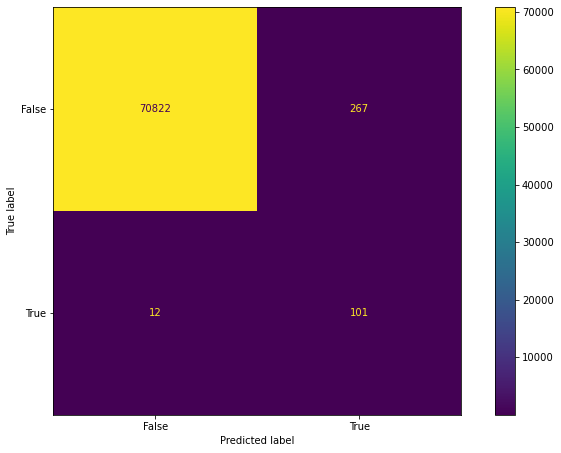

In [54]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf_display = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = [False, True])
cm_rf_display.plot()
plt.show()

### Logistic Regression

In [55]:
lr = LogisticRegression(C=100.0, random_state=42,class_weight='balanced')
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [56]:
print('Logistic Regression:')
print('_____________________')
print('The accuracy score is: %.3f' % accuracy_score(y_test, y_pred_lr))
print('The precision score is: %.3f' % precision_score(y_test, y_pred_lr))
print('The recall score is: %.3f' % recall_score(y_test, y_pred_lr))

Logistic Regression:
_____________________
The accuracy score is: 0.975
The precision score is: 0.054
The recall score is: 0.912


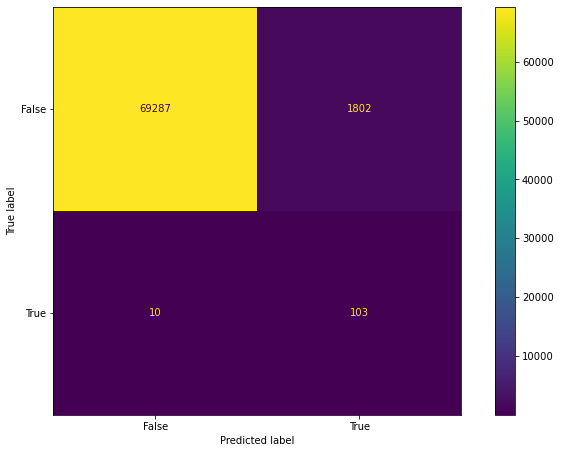

In [57]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr_display = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[False, True])
cm_lr_display.plot()
plt.show()

### Support Vector Classifier

In [59]:
svc = SVC(gamma='auto', class_weight='balanced')

svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

In [60]:
print('Support Vector Classification:')
print('------------------------------')
print('The accuracy score is: %.3f' % accuracy_score(y_test, y_pred_svc))
print('The precision score is: %.3f' % precision_score(y_test, y_pred_svc))
print('The recall score is: %.3f' % recall_score(y_test, y_pred_svc))

Support Vector Classification:
------------------------------
The accuracy score is: 0.994
The precision score is: 0.178
The recall score is: 0.796


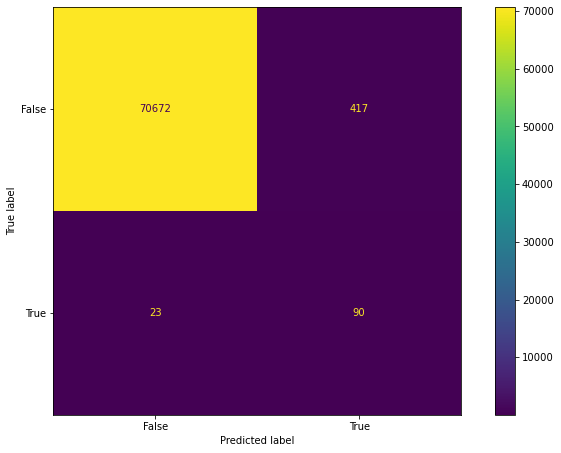

In [61]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc_display = ConfusionMatrixDisplay(confusion_matrix = cm_svc, display_labels = [False, True])
cm_svc_display.plot()
plt.show()


In [41]:
xgb_clf = XGBClassifier(max_depth = 5, learning_rate = 0.08, objective = 'binary:logistic')

xgb_clf.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_clf.predict(X_test_scaled)

In [42]:
print('XG Boost Classifier:')
print('--------------------')
print('The accuracy score is: %.3f' % accuracy_score(y_test, y_pred_xgb))
print('The precision score is: %.3f' % precision_score(y_test, y_pred_xgb))
print('The recall score is: %.3f' % recall_score(y_test, y_pred_xgb))

XG Boost Classifier:
--------------------
The accuracy score is: 1.000
The precision score is: 0.898
The recall score is: 0.779


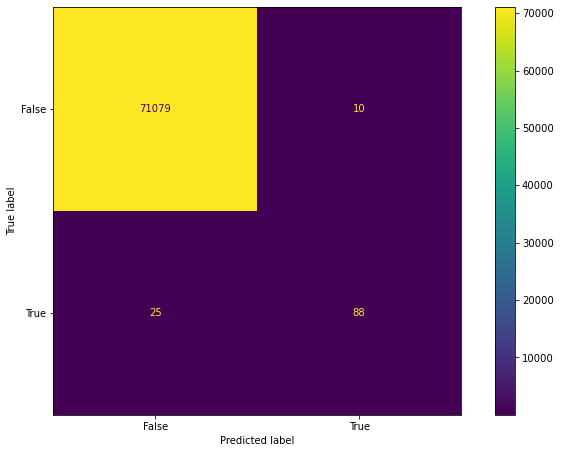

In [43]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb_display = ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = [False, True])
cm_xgb_display.plot()
plt.show()

# SMOTE

In [44]:
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5
)

X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

In [45]:
print('Shape of the original data')

print(X_train_scaled.shape)
print(y_train.shape)

print('Shape of the data generated by SMOTE algorithm')
print(X_train_resampled.shape)
print(y_train_resampled.shape)

Shape of the original data
(213605, 14)
(213605,)
Shape of the data generated by SMOTE algorithm
(426452, 14)
(426452,)


In [46]:
y_train_resampled.value_counts()

0    213226
1    213226
Name: Class, dtype: int64

In [47]:
xgb_clf2 = XGBClassifier(max_depth = 5, learning_rate = 0.08, objective = 'binary:logistic')
xgb_clf2.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
y_pred_smote = xgb_clf2.predict(X_test)

In [49]:
print('XG Boost Classifier:')
print('--------------------')
print('The accuracy score is: %.3f' % accuracy_score(y_test, y_pred_smote))
print('The precision score is: %.3f' % precision_score(y_test, y_pred_smote))
print('The recall score is: %.3f' % recall_score(y_test, y_pred_smote))

XG Boost Classifier:
--------------------
The accuracy score is: 0.995
The precision score is: 0.240
The recall score is: 0.858


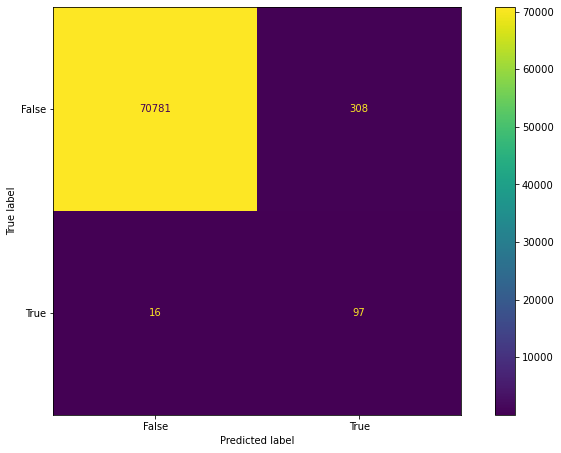

In [50]:
cm_smote = confusion_matrix(y_test, y_pred_smote)
cm_smote_display = ConfusionMatrixDisplay(confusion_matrix = cm_smote, display_labels = [False, True])
cm_smote_display.plot()
plt.show()